In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df={'x':[1,2,3,4,5],'y':[2,4,6,8,10]}
d=pd.DataFrame(df)
d

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [ ]:
x=d['x'].values
y=d['y'].values
x_m=np.mean(x)
y_m=np.mean(y)

In [ ]:
numerator=np.sum((x-x_m)*(y-y_m))
denominator=np.sum((y-y_m)**2)
m=(numerator)/(denominator)
m

np.float64(0.5)

In [ ]:
c=y_m-m*x_m

c

np.float64(4.5)

In [ ]:
x_i=int(input("Give Input For The Model:"))

Give Input For The Model:5


In [ ]:
y_p=m*x_i+c
y_p

np.float64(7.0)

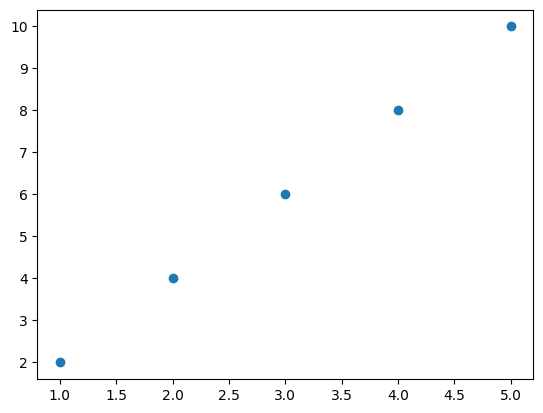

In [ ]:
plt.scatter(x,y,marker='o')

**WITH LIB Exercise**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
df.rename(columns={'per capita income (US$)':'Income'}, inplace=True)
df.head()


,year,Income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


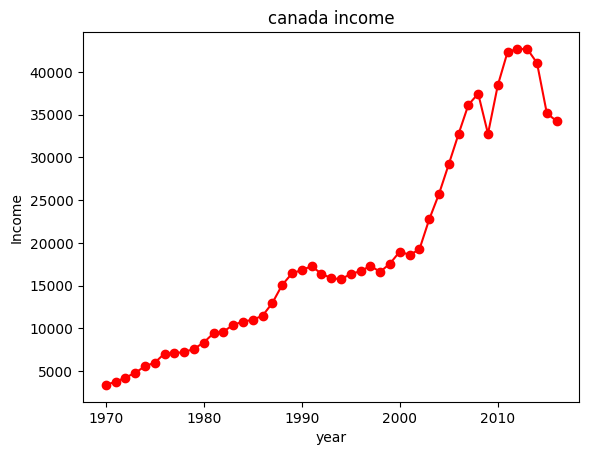

In [ ]:
plt.plot(df['year'],df['Income'], color='r', marker='o')
plt.title('canada income')
plt.xlabel('year')
plt.ylabel('Income')
plt.show()

In [ ]:
reg=LinearRegression()
reg.fit(df[['year']],df.Income)

LinearRegression()

In [ ]:
reg.predict([[2025]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45431.01947053])

In [ ]:
reg.coef_


array([828.46507522])

In [ ]:
reg.intercept_

np.float64(-1632210.7578554575)

In [ ]:
828.46507522*2025-1632210.7578554575

45431.01946504251

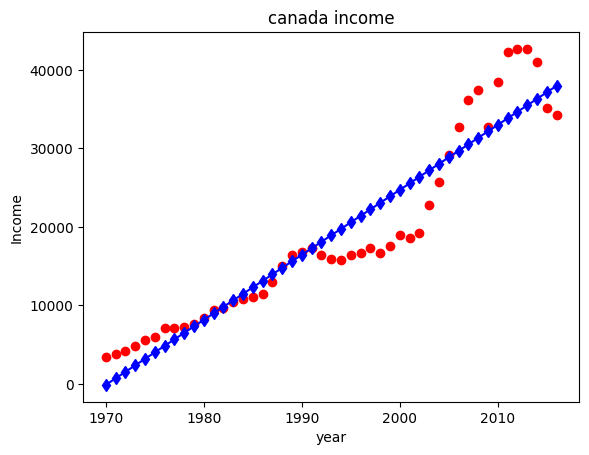

In [ ]:
plt.scatter(df['year'],df['Income'], color='r', marker='o')
plt.plot(df['year'],reg.predict(df[['year']]), color='b', marker='d')
plt.title('canada income')
plt.xlabel('year')
plt.ylabel('Income')
plt.show()

In [ ]:
reg.score(df[['year']],df.Income)

0.890916917957032

**Multiple Points Linear Regression**

In [ ]:
hf=pd.read_csv('hiring.csv')
hf


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hf.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score','salary($)':'salary'}, inplace=True)
hf

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math
hf.test_score.fillna(hf.test_score.mean(),inplace=True)
hf


/tmp/ipython-input-71-153555424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf.test_score.fillna(hf.test_score.mean(),inplace=True)


,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [ ]:
numbers={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11}
nu=hf['experience'].values
nu.tolist()

[nan, nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven']

In [ ]:
nu=nu[2:]
nu=nu.tolist()

In [ ]:
for i in range(len(nu)):
  nu[i]=numbers[nu[i]]

In [ ]:
nu

[5, 2, 7, 3, 10, 11]

In [ ]:
hf['experience'][2:]=nu
hf

/tmp/ipython-input-86-76018152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf['experience'][2:]=nu


,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [ ]:
hf['experience'].fillna(hf.experience.median(),inplace=True)
hf

/tmp/ipython-input-87-1592520723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf['experience'].fillna(hf.experience.median(),inplace=True)
/tmp/ipython-input-87-1592520723.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hf['experience'].fillna(hf.experience.median(),inplace=True)


,experience,test_score,interview_score,salary
0,6.0,8.000000,9,50000
1,6.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [ ]:
mulreg=LinearRegression()
mulreg.fit(hf[['experience','test_score','interview_score']],hf.salary)

LinearRegression()

AttributeError: 'LinearRegression' object has no attribute 'compile'

In [ ]:
mulreg.coef_

array([2823.76559304, 1329.00027432, 2929.14459978])

In [ ]:
mulreg.intercept_

np.float64(11842.306307731225)

In [ ]:
mulreg.predict([[11,7,8]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75639.88654964])

In [ ]:
2823.76559304*9+1329.00027432*8+2929.14459978*7+11842.306307731225

68392.21103811123

In [ ]:
mulreg.score(hf[['experience','test_score','interview_score']],hf.salary)

0.3996333405592497

**Gradient Descent**

In [ ]:
def gd(x,y):
  n=len(x)
  m_c=b_c=0
  lr=0.01
  for i in range(1000):
    y_p=m_c*x+b_c
    cost=(2/n)*sum([val**2 for val in (y-y_p)])
    m_d=-(2/n)*(sum(x*(y-y_p)))
    b_d=-(2/n)*(sum(y-y_p))
    m_c=m_c-lr*m_d
    b_c=b_c-lr*b_d
    print(f"cost :{cost}, m :{m_c}, b :{b_c} , iterations :{i}")

In [ ]:
x=np.array([1,2,3,4,5,6])
y=np.array([2,4,6,8,10,12])
gd(x,y)

cost :121.33333333333333, m :0.6066666666666667, b :0.14 , iterations :0
cost :56.19672592592591, m :1.019511111111111, b :0.23473333333333335 , iterations :1
cost :26.04925818041152, m :1.3004947407407408, b :0.2986728888888889 , iterations :2
cost :12.095816164902752, m :1.4917709004938273, b :0.34166479925925924 , iterations :3
cost :5.637457231199479, m :1.622017191395885, b :0.37040754023950617 , iterations :4
cost :2.648049714176781, m :1.7107434488557012, b :0.3894581860370041 , iterations :5
cost :1.2641790689542305, m :1.7712225296802149, b :0.40191698089636496 , iterations :6
cost :0.6234011214661089, m :1.8124841736811375, b :0.4098930642008226 , iterations :7
cost :0.3265508172307726, m :1.8406714598371348, b :0.41482131075912654 , iterations :8
cost :0.1888825780657718, m :1.8599636252667318, b :0.4176778823553446 , iterations :9
cost :0.12489059270190553, m :1.8732038738376158, b :0.41912687093956646 , iterations :10
cost :0.09500019157095053, m :1.882326484474436, b :0.4

In [ ]:
import pickle
with open('reg_model','wb') as f:
  pickle.dump(reg,f)
with open('mul_reg_model','wb') as f:
  pickle.dump(mulreg,f)